In [1]:
#import packages
import seaborn as sns
import pandas as pd
import math
import numpy as np

# Let's look at rentals in Riga city centre, October 2022.


In [2]:
# import data and explore it
df= pd.read_excel(r'C:\Users\lenovo\Desktop\Project2\flats_rent_sale_edit.xlsx', sheet_name="Rent")
df.head()

,Adress,Rooms,m2,Price,Floor
0,Abrenes 11,1,40,350,2/6
1,Alauksta 10,1,34,300,2/6
2,Alberta 2A,3,67,750,1/4
3,Alūksnes 1,2,51,650,3/6
4,Alūksnes 2,2,53,370,4/5


In [7]:
df.corr()

,Rooms,m2,Price
Rooms,1.000000,0.832485,0.688377
m2,0.832485,1.000000,0.798760
Price,0.688377,0.798760,1.000000


In [65]:
df.describe().astype(int)

,Rooms,m2,Price
count,249,249,249
mean,2,63,568
std,1,39,399
min,1,12,90
25%,1,38,320
50%,2,55,445
75%,3,80,700
max,8,325,2800


In [63]:
df.dtypes

Adress           object
Rooms             int64
m2                int64
Price             int64
Floor            object
Floor Type       object
Size Category    object
dtype: object

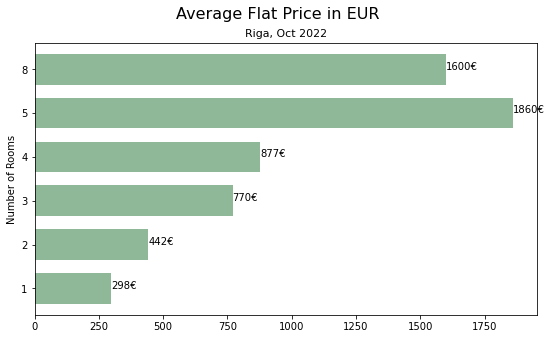

In [84]:
#average rent price in eur per nr of rooms
df_mean2=df.groupby(['Rooms'])['Price'].mean().reset_index().astype(int)
ax1=df_mean2.plot.barh( x='Rooms', y= 'Price', color= '#8EB897', figsize=(9,5),width=0.7)
#ax1.grid(linewidth=0.5,axis='x')
ax1.set_title('Riga, Oct 2022', fontsize=11)
ax1.set_ylabel("Number of Rooms", fontsize=10)
ax1.get_legend().remove()
ax1.figure.suptitle('Average Rent Price', fontsize=16 )
y=df_mean2['Price']
for index, value in enumerate(y):
    ax1.text(value, index,
             str(value) + "€")





Text(0, 0.5, '')

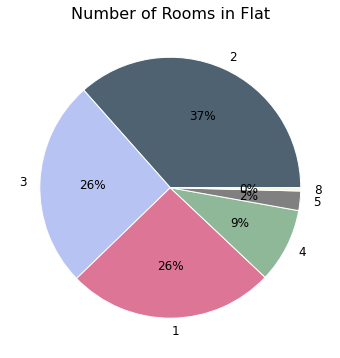

In [3]:
#number of rooms  %
room_count=df.Rooms.value_counts()
ax=room_count.plot.pie(figsize=(6,6), fontsize=12,
                    wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, 
                    colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', 'grey', 'beige' ],
                      autopct='%.0f%%')
ax.set_title('Number of Rooms in Flat', fontsize=16)
ax.set_ylabel(None)

Majority of flats available for rent are 2 bedroom, then 1 bedroom and 3 bedroom.

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

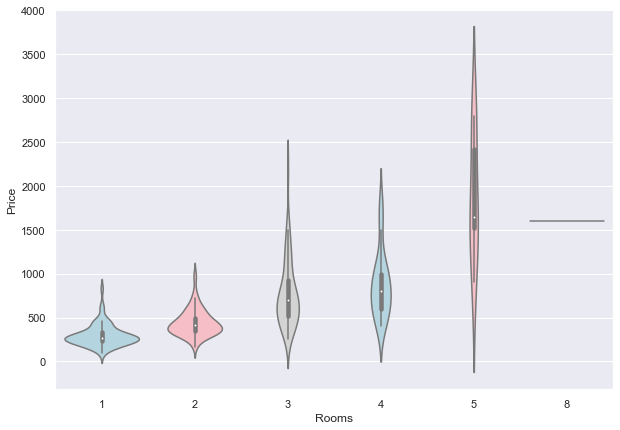

In [4]:
sns.set(rc = {'figure.figsize':(10,7)})
sns.violinplot(x="Rooms", y="Price", data=df,
               palette=["lightblue", "lightpink","lightgrey"])


We conclude that for 1 bedroom and 2 bedroom flats medium price is the most common, it’s the most pronounced in 1 bedroom flats, while the other flats vary in price. The highest price variability we see for the 5 bedroom flats. There is just one data set for 8 bedroom flats.

In [9]:
#remove whitespace before floor number and turn it in string
df['Floor']=df.Floor.astype(str).str.strip()
print(len(df.Floor[0]))


3


In [98]:
#create floor categories func
def floor_to_categories(floor_str):
    num1, num2 = floor_str.split("/")
    if num1 == num2: return "Top"
    elif num1 == "1": return "Ground"
    return "Middle"
#apply func
df["Floor Type"] = df.Floor.apply(floor_to_categories)
#explore average price per floor category
AvgpriceByFloorType=df.groupby("Floor Type").Price.mean().astype(int).reset_index()


In [99]:
#Top 10 most expensive flats for rent

df_sorted= df.sort_values("Price",ascending=False)
top10=df_sorted.head(10).groupby("Floor Type").Price.mean().astype(int).reset_index()


In [100]:
#Top 10 least expensive flats for rent
last10=df_sorted.tail(10).groupby("Floor Type").Price.mean().astype(int).reset_index()


In [16]:
from IPython.display import display_html
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [101]:
#Display Avg price grouped by Floor Type
display_side_by_side([top10,AvgpriceByFloorType,last10],["10 Most Expensive",'All','10 The Cheapest'])

,Floor Type,Price
0,Ground,1600
1,Middle,1637
2,Top,2212
,Floor Type,Price
0,Ground,464
1,Middle,550
2,Top,671
,Floor Type,Price
0,Ground,177
1,Middle,150


We see that on average top floor is more expensive and ground floor is the cheapest , except for 10 cheapest rentals where it's reversed but price difference in very small.

In [105]:
#create size categories for m2 using condition statements

category = []
for i in df_sorted['m2']:
    if i <=30:
        category.append('Small')   
    elif i <= 80:
        category.append('Normal')
    elif i <= 160:
        category.append('Big')
    else:
        category.append('Huge')

df_sorted['Size Category'] = category
print(df_sorted.head())


               Adress  Rooms   m2  Price  Floor Floor Type Size Category
196      Skanstes 29a      5  325   2800  24/24        Top          Huge
12          Ausekļa 4      5  195   2660    7/7        Top          Huge
7       Antonijas 17A      3   86   2200    6/6        Top           Big
31        Blaumaņa 16      4  136   1800    4/6     Middle           Big
186  Rūpniecības 21k2      5  160   1700    7/7        Top           Big


In [116]:
#explore price in each size category
df_sorted.groupby('Size Category')[['Price']].aggregate([min, max, 'mean']).astype(int).reset_index()                                                 

Size Category Price            
                  min   max  mean
0           Big   170  2200   950
1          Huge  1000  2800  2015
2        Normal   165  1200   470
3         Small    90   830   274

<AxesSubplot:xlabel='Size Category', ylabel='Price'>

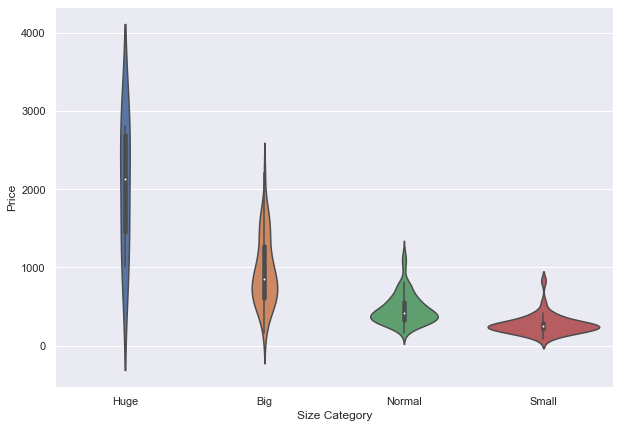

In [118]:
sns.set(rc = {'figure.figsize':(10,7)})
sns.violinplot(x="Size Category", y="Price", data=df_sorted)


On average bigger square footage translates in higher price, but price range between smallest and biggest price in each category is massive. 

In [71]:
#find out Avg size per Nr of Rooms
AvgRoomSize=df.groupby('Rooms')["m2"].mean().astype(int)
print(AvgRoomSize)

Rooms
1     30
2     51
3     81
4    116
5    186
8    203
Name: m2, dtype: int32


In [113]:
#explore number of flats available in each size category
df_sorted.groupby("Size Category").size()

Size Category
Big        54
Huge        4
Normal    152
Small      39
dtype: int64

In [6]:
function_dictionary = {'Size Category':'count','Price':'mean'}
df_sorted.groupby("Rooms").aggregate(function_dictionary)

NameError: name 'df_sorted' is not defined